In [1]:
# libraries we have used
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn

In [2]:
#================================STEP 1:  IMPORTING DATASETS AND BASIC INFO==============================================

In [100]:

# importing the datset and naming the columns according to the dataset source

# datset source http://205.174.165.80/CICDataset/NSL-KDD/Dataset/


# column names imported from the datset


col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

# importing the train data into pandas dataframe
data = pd.read_csv("KDDTrain+.csv", header = None, names = col_names)


#importing the test data into pandas dataframe
data_test = pd.read_csv("KDDTest+.csv", header =None, names= col_names)



In [101]:
# displaying the first five rows of dataset

data_test.head(20)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [102]:
# showing the number of rows and columns in the data
data.shape


(125973, 43)

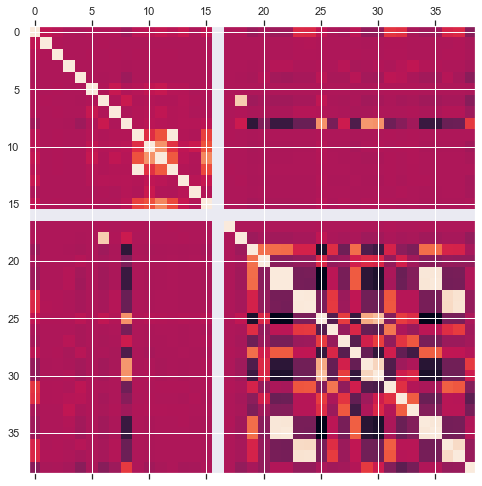

In [103]:
# applying the correlation between the features to check the desity of inter feature relation
plt.matshow(data.corr())# this function shows all the correlation between the featues so we can check which feature is more strongly connected to other feature

In [104]:
 # as per the research paper  A Detailed analysis of the KDD CUP 99 Data Set there are total four kinds of attacks found in this dataset
'''
   1) Denial of Service Attack (DoS): is an attack in
which the attacker makes some computing or memory
resource too busy or too full to handle legitimate requests,
or denies legitimate users access to a machine.
2) User to Root Attack (U2R): is a class of exploit in
which the attacker starts out with access to a normal
user account on the system (perhaps gained by snifﬁng
passwords, a dictionary attack, or social engineering)
and is able to exploit some vulnerability to gain root
access to the system.
3) Remote to Local Attack (R2L): occurs when an
attacker who has the ability to send packets to a
machine over a network but who does not have an
account on that machine exploits some vulnerability to
gain local access as a user of that machine.
4) Probing Attack: is an attempt to gather information
about a network of computers for the apparent purpose
of circumventing its security controls.
   '''
# we will now intruduce a new column of attack class which is determined by the mappings provided for each attack
    
    

'\n  1) Denial of Service Attack (DoS): is an attack in\nwhich the attacker makes some computing or memory\nresource too busy or too full to handle legitimate requests,\nor denies legitimate users access to a machine.\n2) User to Root Attack (U2R): is a class of exploit in\nwhich the attacker starts out with access to a normal\nuser account on the system (perhaps gained by snifﬁng\npasswords, a dictionary attack, or social engineering)\nand is able to exploit some vulnerability to gain root\naccess to the system.\n3) Remote to Local Attack (R2L): occurs when an\nattacker who has the ability to send packets to a\nmachine over a network but who does not have an\naccount on that machine exploits some vulnerability to\ngain local access as a user of that machine.\n4) Probing Attack: is an attempt to gather information\nabout a network of computers for the apparent purpose\nof circumventing its security controls.\n  '

In [105]:
# =======================================STEP 2: SIMPLIFYING THE FEATURE (LABEL) TO IMPROVE RESULT=======================================================

In [106]:
'''first of all as mentioned above we are going to replace the label column by 4 mentioned types of attacks and to replace it
for each label we must have some mapping or scheme. so below is the mapping provided by the source:

'''
# furthermore this step will make us easy to detect intrusions and apply ml algorithms

mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }



# now replacing the label with  a new column attack class


data['attack_class'] = data['label'].apply(lambda v: mapping[v])
data_test['attack_class'] = data_test['label'].apply(lambda v: mapping[v])

# dropping the old label column which we dont need now
data.drop(['label'], axis=1, inplace=True)
data_test.drop(['label'], axis=1, inplace=True)

In [107]:
data['attack_class']

0         Normal
1         Normal
2            DoS
3         Normal
4         Normal
           ...  
125968       DoS
125969    Normal
125970    Normal
125971       DoS
125972    Normal
Name: attack_class, Length: 125973, dtype: object

In [108]:
data.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,Normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,DoS
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,DoS
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,21,DoS
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,DoS
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,21,DoS


In [109]:
#=========================STEP3: EDA Exploratory Data Analysis===============================================

In [110]:
# feature wise statistical analysis
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [111]:
data['attack_class'].describe()

count     125973
unique         5
top       Normal
freq       67343
Name: attack_class, dtype: object

In [112]:
# checking the distribution trends among the attack classses

# calculating the frequency of each type of attack

attack_class_frequency = data[['attack_class']].apply(lambda x: x.value_counts())

attack_class_frequency['frequency_percent_train'] = (100 * attack_class_frequency / attack_class_frequency.sum())
attack_class_distribution = pd.concat([attack_class_frequency], axis=1)
attack_class_distribution

,attack_class,frequency_percent_train
Normal,67343,53.458281
DoS,45927,36.457812
Probe,11656,9.252776
R2L,995,0.789852
U2R,52,0.041279


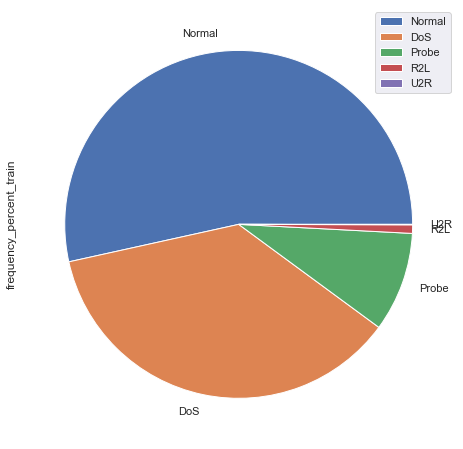

In [113]:
# visual representation of above results

plotting_freq = attack_class_distribution[['frequency_percent_train']].plot(kind="pie",subplots=True)

In [114]:
#=================================STEP 4 : DATA PREPROCESSING ========================================================

In [115]:

# pre-processing refers to the transformations applied to 
#your data before feeding it to the algorithm. In python, scikit-learn library has a
# pre-built functionality under sklearn.preprocessing.


In [116]:
#importing the scaler 
# scaling is used only for numerical 
# standard scaling has been used to minimize the variance in features including  continous numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64','int64']))

scaled_data_test = scaler.fit_transform(data_test.select_dtypes(include=['float64','int64']))

In [117]:
# showing the results of numerical features after applying scaler(converted to np array) MUST BE CONVERTED BACK TO DATAFRAME

scaled_columns=[]
for col in data.columns.values:
# Encoding only categorical variables
    if data[col].dtypes=='float64'or data[col].dtypes=='int64':
        scaled_columns.append(data[col].name)


scaled_data = pd.DataFrame(scaled_data,columns = scaled_columns)
scaled_data.head()



,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823


In [153]:
# the next step of data preprocessing is to convert all the categorial attributes to encodings so they can be easily used 
# in the training models and provide more accurate results
#======================================== STEP 5FEATURE ENCODING==============================================

#Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values
#. LabelEncoder encode labels with value between 0 and n_classes-1



from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# dropping the attack class because we dont need its encodings



# Iterating over all the common columns in train data

for col in data.columns.values:
# Encoding only categorical variables
    if data[col].dtypes=='object':

        data[col]= le.fit_transform(data[col])
        print(data[col])
        
        
        
#repeating for test


for col in data_test.columns.values:
# Encoding only categorical variables
    if data_test[col].dtypes=='object':

        data_test[col]= le.fit_transform(data_test[col])
        print(data_test[col])
        





# separate target column from encoded data 
encoded_train = data.drop(['attack_class'], axis=1)
encoded_test = data_test.drop(['attack_class'], axis=1)

Ytrain = data[['attack_class']].copy()
Ytest = data_test[['attack_class']].copy()
encoded_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,21
22540,0,1,22,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,21
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,15
22542,0,2,11,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,21


In [22]:
encoded_train.head()  # all categorial data has been converted to encodings now they can be used in ml models

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [23]:
# the next step is of data sampling in the dataset
#Data sampling is a statistical analysis technique used to select, 
#manipulate and analyze a representative subset of data points
#to identify patterns and trends in the larger data set being examined
#'''Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
#Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
#Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.
#'''

In [154]:
# we apply random oversampling to balance the data by sampling the minority class with replacement

# reshape target column attack_class to 1D array shape 1 d array is made because the random oversampling requires so
c, r = Ytrain.values.shape
Ytrain = Ytrain.values.reshape(c,)
print(Ytrain.size ,'is the size of 1 dimensional np array ')
#reshaping the target column in test dataset
d, e = Ytest.values.shape
Ytest = Ytest.values.reshape(d,)


125973 is the size of 1 dimensional np array 


In [121]:
#importing the imbalanced learn library
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
#making a random over sampling function focused on over sampling the minority class
func = RandomOverSampler(sampling_strategy = 'minority')


#doing the oversampling in the training dataset
x_overs, y_overs = func.fit_resample(encoded_train,Ytrain)
#results of oversampling

print('Original dataset shape {}'.format(Counter(Ytrain)))
print('Resampled dataset shape {}'.format(Counter(y_overs)))



Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 4: 67343, 0: 45927, 2: 11656, 3: 995})


In [26]:
#in the above output it can be observed that the oversampling has been done and minority classes have been filled with copies 
#to make the elements in minority calss greater so ml algorithm can give more accurate results

In [155]:
#=========================================STEP6 : FEATURE SELECTION======================================================
Ytest

array([0, 0, 1, ..., 0, 1, 2])

In [28]:
#in data science we have hundreds or even millions of features and we want a way to create a 
#model that only includes the most important features. This has three benefits. First, we make our model more simple
#to interpret. Second, we can reduce the variance of the model, and therefore overfitting. 
#Finally, we can reduce the computational cost (and time) of training a model. The process of 
#identifying only the most relevant features is called “feature selection'

In [29]:
# we will use random forest classifier algorithm for feature selection
#================================working of a random forest tree classifier=================================
#Random forests consist of 4 –12 hundred decision trees, each of them built over a random extraction of the observations 
#from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations,
#and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a 
#sequence of yes-no questions based on a single or combination of features. At each node (this is at each question),
#the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves
#and different from the ones in the other bucket. Therefore, the importance of each feature is derived from how “pure”
#each of the buckets is.




In [30]:
from sklearn.ensemble.forest import RandomForestClassifier
 
classifier = RandomForestClassifier(n_estimators= 1000)

# it makes 100 trees can be made more to increase no of trees 
classifier.fit(x_overs, y_overs)

C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset 
#and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as 
#the original input sample size but the samples are drawn with replacement if


In [32]:
#plotting the importance of each selected feature  (rounding the data so it can be plotted)
print(classifier.feature_importances_)

[2.80069437e-02 1.86799565e-02 3.71380694e-02 4.41253503e-02
 5.74326353e-02 5.49488044e-02 1.76354237e-05 3.46015708e-03
 1.62803834e-05 8.97578569e-03 1.89316684e-04 1.23557063e-02
 5.39429322e-03 1.05760781e-02 3.92410486e-05 2.08307657e-03
 7.57043157e-03 3.96025474e-04 2.33402094e-05 0.00000000e+00
 0.00000000e+00 1.43345415e-03 3.55881496e-02 3.21072235e-02
 1.85811777e-02 2.28136277e-02 5.66050066e-03 3.78459201e-03
 5.04535552e-02 2.39044212e-02 6.01029138e-03 5.12072032e-02
 9.91172342e-02 1.93278837e-02 2.84181742e-02 3.32662438e-02
 9.78949122e-03 3.56418349e-02 2.74376414e-02 1.07482129e-02
 7.62125469e-03 1.85658705e-01]


In [33]:
score = np.round(classifier.feature_importances_,3)
score

array([0.028, 0.019, 0.037, 0.044, 0.057, 0.055, 0.   , 0.003, 0.   ,
       0.009, 0.   , 0.012, 0.005, 0.011, 0.   , 0.002, 0.008, 0.   ,
       0.   , 0.   , 0.   , 0.001, 0.036, 0.032, 0.019, 0.023, 0.006,
       0.004, 0.05 , 0.024, 0.006, 0.051, 0.099, 0.019, 0.028, 0.033,
       0.01 , 0.036, 0.027, 0.011, 0.008, 0.186])

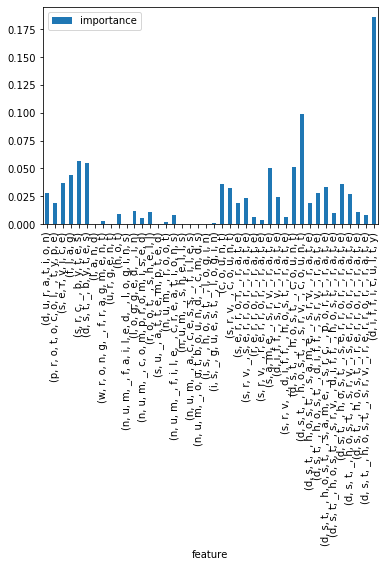

In [34]:
#create a dataframe to plot
plot_imp = pd.DataFrame({'feature':x_overs,'importance':score}).plot(kind='bar', x= 'feature')

In [35]:
#the results of random forest classifier are shown visually , we get clear idea of important features

In [36]:
#we can verify our results by of important features by using following function
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel #selection function already made by library
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))#applying forest classification
selector.fit(x_overs, y_overs) 
selected_feat= x_overs.columns[(selector.get_support())]#extracing the important features
print(selected_feat)

Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'difficulty'],
      dtype='object')


In [123]:
#redesigning the dataset


X_train = x_overs[['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count',
       'srv_serror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'difficulty']]



#the number of rows were not equal so they were made equal
X_train = X_train[:125973]
print(X_train.shape)
print(Ytest.shape)








(125973, 13)
(22544, 1)


array([1, 1, 0, ..., 1, 0, 1])

In [148]:
X_test= encoded_test[['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count',
       'srv_serror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'difficulty']]

print(X_test.shape)
print(Ytest.shape)
#so make the Ytest equal to numbers
Ytest =Ytest[:125973]
print(Ytest.shape)




(22544, 13)
(22544, 1)
(22544, 1)


,attack_class
0,0
1,0
2,1
3,2
4,2
...,...
22539,1
22540,1
22541,0
22542,1


1

In [39]:
#======================================STEP 7: GAUSSIAN NAIVE BAYES THEOREM=======================================

In [40]:
#applying the training models on train data



from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import metrics

In [41]:
Gaussian_model = GaussianNB() #  making the object of gaussian naive bayes
Gaussian_model.fit(X_train,Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [125]:
predict_train_gaussian = Gaussian_model.predict(X_test)
print('Target on train data',predict_train_gaussian) 

Target on train data [0 0 0 ... 1 0 0]


In [156]:
classification_report = metrics.classification_report (Ytest, predict_train_gaussian)

In [157]:
print(classification_report) # we can show that using gaussian NB the results are very poor

              precision    recall  f1-score   support

           0       0.34      0.89      0.49      7458
           1       0.60      0.17      0.26      9711
           2       0.00      0.00      0.00      2421
           3       0.12      0.00      0.00      2754
           4       0.02      0.02      0.02       200

    accuracy                           0.37     22544
   macro avg       0.22      0.22      0.15     22544
weighted avg       0.39      0.37      0.27     22544



In [158]:
# now applying bernoulli NB for binary features that is bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB 
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train,Ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [159]:
#checking the results on train data

predict_train_bernoulli = bernoulli_model.predict(X_test)
print('Target on train data',predict_train_bernoulli) 

Target on train data [0 0 1 ... 1 1 0]


In [160]:





classification_report_bernoulli = metrics.classification_report (Ytest, predict_train_bernoulli)
print(classification_report_bernoulli)

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      7458
           1       0.64      0.98      0.78      9711
           2       0.52      0.15      0.23      2421
           3       0.78      0.03      0.07      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.69     22544
   macro avg       0.55      0.38      0.37     22544
weighted avg       0.70      0.69      0.63     22544



In [161]:
Ytrain
#we can see from above results that test and train data from bernoulli Naive Bayes Algo give satisfactory prediction results

array([1, 1, 0, ..., 1, 0, 1])

In [162]:
cm = metrics.confusion_matrix(Ytest,predict_train_bernoulli)
cm

array([[5630, 1632,  196,    0,    0],
       [  43, 9562,   97,    7,    2],
       [1116,  935,  365,    5,    0],
       [   2, 2643,   14,   95,    0],
       [  83,   71,   31,   15,    0]], dtype=int64)

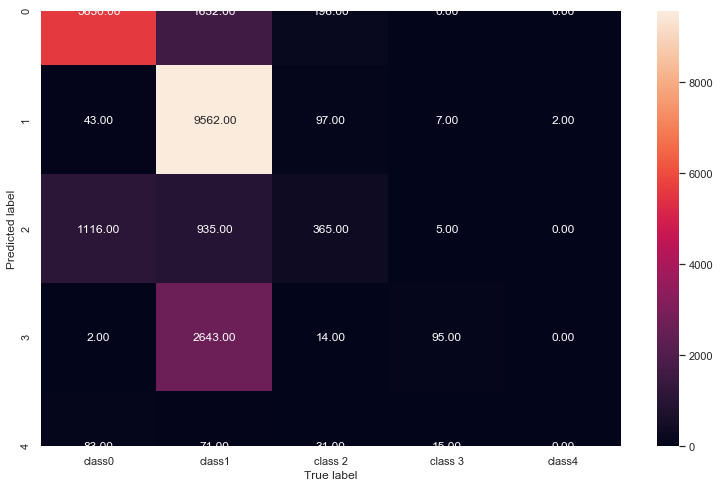

In [163]:


sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["class0", "class1","class 2","class 3","class4"] , yticklabels = ["0", "1","2","3","4"],cbar=True)
plt.xlabel('True label',fontsize=12)
plt.ylabel('Predicted label',fontsize=12)

sn.set(rc={'figure.figsize':(13,8)})

In [147]:
#results of applying bernoulli 


,attack_class
0,0
1,0
2,1
3,2
4,2
...,...
22539,1
22540,1
22541,0
22542,1


In [165]:
#precision score

print('precision scores for the 4 classes are:')
scores = metrics.precision_score(Ytest, predict_train_bernoulli, average=None)
for i in scores:
    print(i)

    
print('The mean accuracy score of classification is')
#accuracy scores of the multiclass classification can be shown
metrics.accuracy_score(np.array(Ytest),np.array(predict_train_bernoulli))




precision scores for the 4 classes are:
0.8190282222868781
0.6442093916324193
0.519203413940256
0.7786885245901639
0.0
The mean accuracy score of classification is


0.6942867281760113

In [54]:
# ============================Step8 : Logistic Regression ===========================================================

In [167]:
from sklearn.linear_model import LogisticRegression

#multinomial logistic regression using saga algorithm
model_LR = LogisticRegression(solver = 'saga',multi_class='multinomial',max_iter=30000)

model_LR.fit(X_train,Ytrain)

# # coefficeints of the trained model
# print('Coefficient of model :', model.coef_)

# # intercept of the model
# print('Intercept of model',model.intercept_)

# predict the target on the train dataset
predict_train_LR = model_LR.predict(X_train)
print('Target on train data',predict_train_LR) 



classification_report_LR = metrics.classification_report (Ytrain, predict_train_LR)
print(classification_report_LR)


# Accuray Score on train dataset
accuracy_train_LR = metrics.accuracy_score(Ytrain,predict_train_LR)
print('accuracy_score on train dataset : ', accuracy_train_LR)


Target on train data [1 1 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     45927
           1       0.83      0.84      0.83     67343
           2       0.00      0.00      0.00     11656
           3       0.00      0.00      0.00       995
           4       0.00      0.00      0.00        52

    accuracy                           0.76    125973
   macro avg       0.34      0.34      0.34    125973
weighted avg       0.76      0.76      0.76    125973

accuracy_score on train dataset :  0.7591706159256348


C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
#checking the results of logistic regression on test data

predict_test_LR = model_LR.predict(X_test)
print('Target on train data',predict_test_LR) 

classification_report_LR = metrics.classification_report (Ytest, predict_test_LR)
print(classification_report_LR)









# Accuray Score on train dataset
accuracy_test_LR = metrics.accuracy_score(Ytest,predict_test_LR)
print('accuracy_score on test dataset : ', accuracy_test_LR)

Target on train data [0 0 2 ... 2 1 0]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      7458
           1       0.58      0.82      0.68      9711
           2       0.00      0.00      0.00      2421
           3       0.00      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.55     22544
   macro avg       0.27      0.28      0.27     22544
weighted avg       0.50      0.55      0.51     22544

accuracy_score on test dataset :  0.5523420865862314


C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
#if we use the basic two class logistic regression

for i in Ytrain:
    if i == 1:
        i=1
    else:
        i=0


In [141]:
# #=======================================Step 9logistic regression on two classes ============================
# model = LogisticRegression(solver = "liblinear",max_iter =3000)

# model.fit(X_train,Ytrain)

# # # coefficeints of the trained model
# # print('Coefficient of model :', model.coef_)

# # # intercept of the model
# # print('Intercept of model',model.intercept_)

# # predict the target on the train dataset
# predict_test = model.predict(X_test)
# print('Target on train data',predict_test) 


# accuracy_test = metrics.accuracy_score(Ytest,predict_test)
# print('accuracy_score on test dataset : ', accuracy_test)




Target on train data [0 0 1 ... 1 1 1]
accuracy_score on test dataset :  0.6250443577004968


In [170]:
#=======================================KNN classifier========================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#defing the model



model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Ytrain)






KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:

#getting the predictions on x train


predict_knn = model_knn.predict(X_train)
print(predict_knn)



# accuracy on X_train
# Accuracy Score on train dataset
accuracy_train_knn = metrics.accuracy_score(Ytrain,predict_knn)
print('accuracy_score on train dataset : ', accuracy_train_knn)



[1 1 0 ... 1 0 1]
accuracy_score on train dataset :  0.9957133671501036


In [174]:

predict_knn_test = model_knn.predict(X_test)
print(predict_knn_test)



# accuracy on X_train
# Accuracy Score on train dataset
accuracy_test_knn = metrics.accuracy_score(Ytest,predict_knn_test)
print('accuracy_score on train dataset : ', accuracy_test_knn)





classification_report_knn = metrics.classification_report (Ytest, predict_knn_test)
print(classification_report_knn)

[0 2 1 ... 0 1 0]
accuracy_score on train dataset :  0.7307487579843861
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      7458
           1       0.67      0.97      0.79      9711
           2       0.65      0.58      0.61      2421
           3       0.42      0.00      0.00      2754
           4       1.00      0.04      0.08       200

    accuracy                           0.73     22544
   macro avg       0.73      0.47      0.46     22544
weighted avg       0.71      0.73      0.68     22544



,service,flag,src_bytes,dst_bytes,count,srv_count,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_serror_rate,difficulty
0,20,9,491,0,2,2,0.0,1.00,150,25,0.17,0.00,20
1,44,9,146,0,13,1,0.0,0.08,255,1,0.88,0.00,15
2,49,5,0,0,123,6,1.0,0.05,255,26,0.00,1.00,19
3,24,9,232,8153,5,5,0.2,1.00,30,255,0.03,0.03,21
4,24,9,199,420,30,32,0.0,1.00,255,255,0.00,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,49,5,0,0,184,25,1.0,0.14,255,25,0.00,1.00,20
125969,49,9,105,145,2,2,0.0,1.00,255,244,0.01,0.00,21
125970,54,9,2231,384,1,1,0.0,1.00,255,30,0.00,0.72,18
125971,30,5,0,0,144,8,1.0,0.06,255,8,0.00,1.00,20
